In [1]:
import os
print(os.getcwd())

C:\Users\ASUS\Documents\Git\olist-ecommerce-pipeline\notebooks


In [2]:
import sys
sys.path.append(os.path.abspath(".."))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
orders_raw = pd.read_csv("../data/raw/olist_orders_dataset.csv")
payments_raw = pd.read_csv("../data/raw/olist_order_payments_dataset.csv")
reviews_raw = pd.read_csv("../data/raw/olist_order_reviews_dataset.csv")

In [5]:
orders = orders_raw.copy()
payments = payments_raw.copy()
reviews = reviews_raw.copy()

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### MISSING VALUES

In [8]:
nan_features_orders = [feature for feature in orders.columns if orders[feature].isnull().sum()>1]

print("Percentage of nan values in orders dataset:")
for feature in nan_features_orders:
    print(f"{feature:<29} : {100*np.round(orders[feature].isnull().mean(), 4)}")

Percentage of nan values in orders dataset:
order_approved_at             : 0.16
order_delivered_carrier_date  : 1.79
order_delivered_customer_date : 2.98


In [9]:
nan_features_payments = [feature for feature in payments.columns if payments[feature].isnull().sum()>1]

print("Percentage of nan values in payments dataset:")
for feature in nan_features_payments:
    print(f"{feature:<29} : {100*np.round(payments[feature].isnull().mean(), 4)}")

Percentage of nan values in payments dataset:


In [10]:
nan_features_reviews = [feature for feature in reviews.columns if reviews[feature].isnull().sum()>1]

print("Percentage of nan values in reviews dataset:")
for feature in nan_features_reviews:
    print(f"{feature:<29} : {100*np.round(reviews[feature].isnull().mean(), 4)}")

Percentage of nan values in reviews dataset:
review_comment_title          : 88.34
review_comment_message        : 58.699999999999996


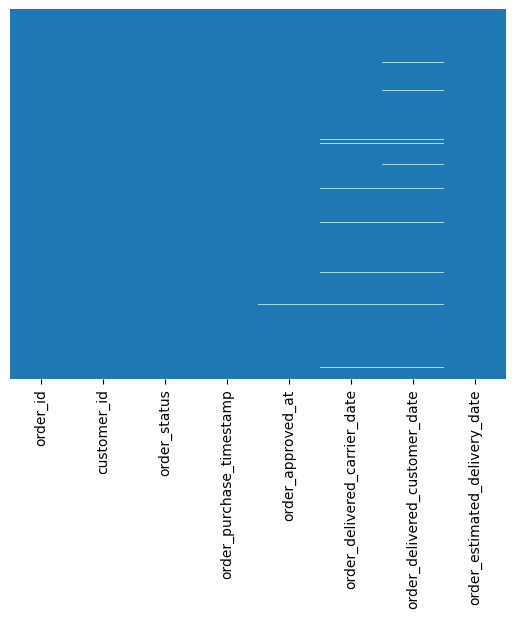

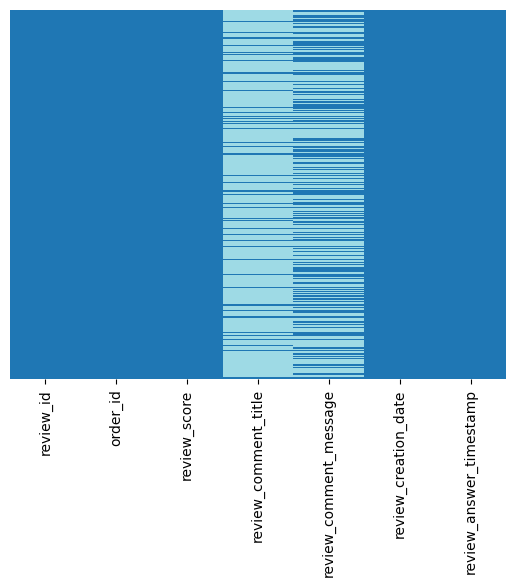

In [11]:
for df in [orders, reviews]:
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20')
    plt.show()

#### HANDLING MISSING VALUES

#### Orders

In [12]:
# Fill NA with placeholder
for feature in nan_features_orders:
    orders[feature] = orders[feature].fillna('Missing')
    print(f"{feature:29} : {np.round(orders[feature].isnull().mean(), 4)}")

order_approved_at             : 0.0
order_delivered_carrier_date  : 0.0
order_delivered_customer_date : 0.0


In [13]:
reviews['review_comment_title'] = reviews['review_comment_title'].fillna("No title")
reviews['review_comment_message'] = reviews['review_comment_message'].fillna("No comment")
for feature in nan_features_reviews:
    print(f"{feature:<25} : {np.round(reviews[feature].isnull().mean(), 4)}")

review_comment_title      : 0.0
review_comment_message    : 0.0


### TEMPORAL VARIABLES

<div class = 'alert alert-block alert-warning'>
    It is obvious that the temporal variables are object type when they should in fact be datetime type.
</div>

In [14]:
datetime_features_orders = [feature for feature in orders.columns if 'order' in feature and feature not in ['order_id', 'order_status']]
datetime_features_orders

['order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [15]:
for feature in datetime_features_orders:
    orders[feature] = pd.to_datetime(orders[feature], errors='coerce')
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

<div class = 'alert alert-block alert-success'>
    Let's follow the same approach for columns in reviews that are to be converted into datetime.
</div>

In [16]:
datetime_features_reviews = ['review_creation_date', 'review_answer_timestamp']
for feature in datetime_features_reviews:
    reviews[feature] = pd.to_datetime(reviews[feature], errors='coerce')
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

#### Engineering new features from datetime features

##### Approval Time (in hours)

In [17]:
orders['approval_time'] = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600
orders['approval_time'].head()

0     0.178333
1    30.713889
2     0.276111
3     0.298056
4     1.030556
Name: approval_time, dtype: float64

##### Delivery time (in days)

In [18]:
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['delivery_time'].head()

0     8.0
1    13.0
2     9.0
3    13.0
4     2.0
Name: delivery_time, dtype: float64

##### Shipping Time (in days)

In [19]:
orders['shipping_time'] = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.days
orders['shipping_time'].head()

0     6.0
1    12.0
2     9.0
3     9.0
4     1.0
Name: shipping_time, dtype: float64

##### Estimated vs. Actual Delivery (in days)
Positive = Late Delivery<br>
Negative = Early Delivery

In [20]:
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['delivery_delay'].head()

0    -8.0
1    -6.0
2   -18.0
3   -13.0
4   -10.0
Name: delivery_delay, dtype: float64

##### Delivered Status
1 = delivered<br>
0 = not delivered

In [21]:
orders['delivered_flag'] = orders['order_delivered_customer_date'].notna().astype(int)
orders['delivered_flag'].head()

0    1
1    1
2    1
3    1
4    1
Name: delivered_flag, dtype: int64

### CATEGORICAL VARIABLES

In [22]:
from utils.cleaning import normalize_all

orders_clean, payments_clean, reviews_clean = normalize_all(orders, payments, reviews)

In [23]:
orders = orders_clean
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,delivery_time,shipping_time,delivery_delay,delivered_flag
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,8.0,6.0,-8.0,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,13.0,12.0,-6.0,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,9.0,9.0,-18.0,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,13.0,9.0,-13.0,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,2.0,1.0,-10.0,1


In [24]:
payments = payments_clean
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
reviews = reviews_clean
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no title,no comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no title,no comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no title,no comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no title,recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no title,parabéns lojas lannister adorei comprar pela i...,2018-03-01,2018-03-02 10:26:53


### DATA TYPES

In [26]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
approval_time                           float64
delivery_time                           float64
shipping_time                           float64
delivery_delay                          float64
delivered_flag                            int64
dtype: object

In [27]:
payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [28]:
reviews.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

### CONTINUOUS VARIABLES

#### Orders

In [29]:
cont_features_orders = [feature for feature in orders.columns if orders[feature].dtype == 'float64']
cont_features_orders

['approval_time', 'delivery_time', 'shipping_time', 'delivery_delay']

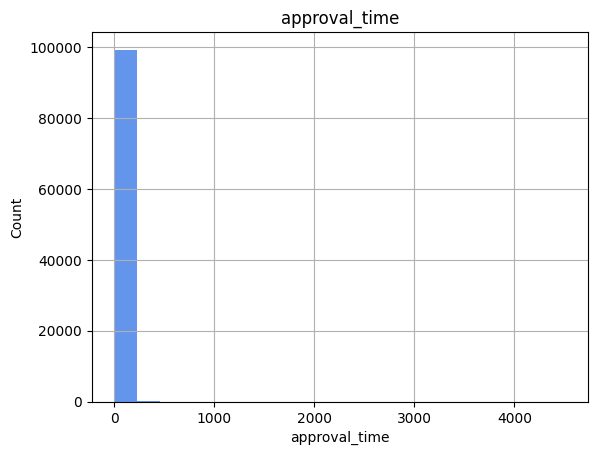

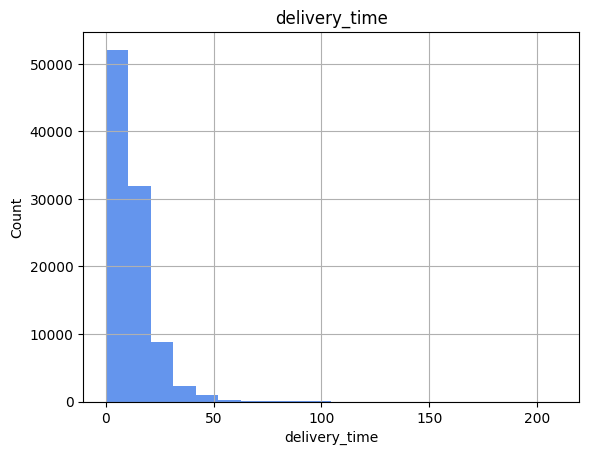

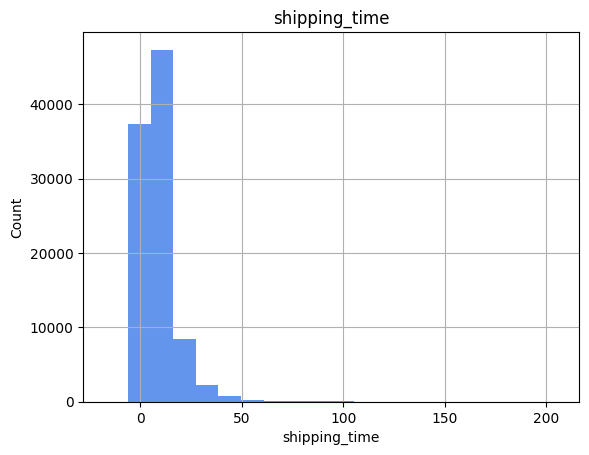

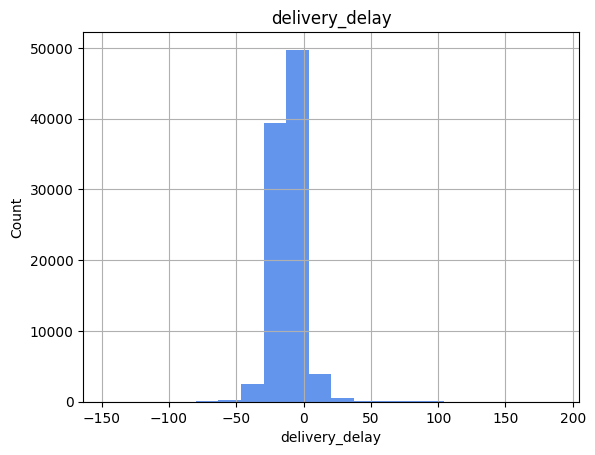

In [30]:
for feature in cont_features_orders:
    data = orders.copy()
    data[feature].hist(bins=20, color='cornflowerblue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### Payments

We will also add payment_installments into cont_features_payments even though it's not a continuous variable, because we still want to perform outlier analysis on it.

In [31]:
cont_features_payments = ['payment_value', 'payment_installments']
cont_features_payments

['payment_value', 'payment_installments']

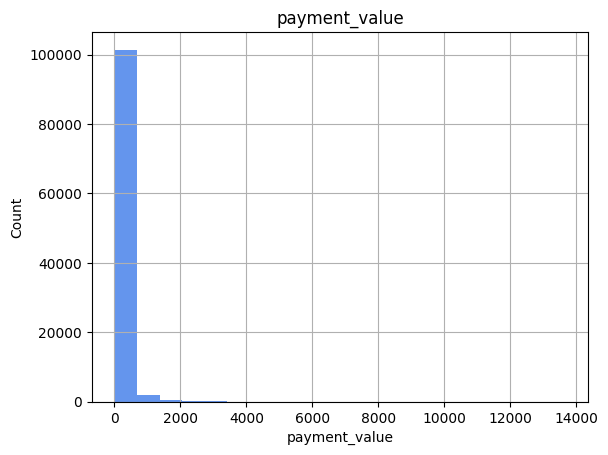

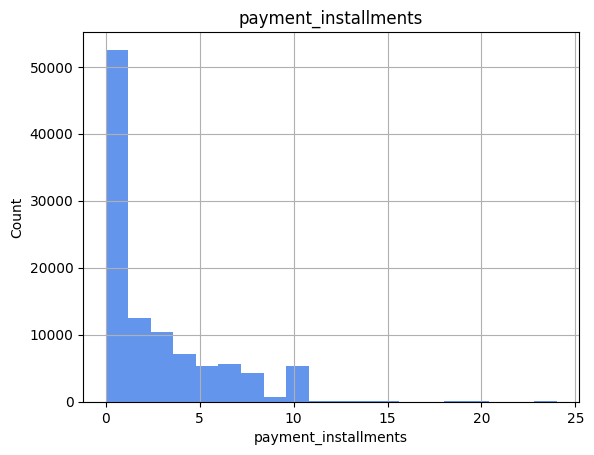

In [32]:
for feature in cont_features_payments:
    data = payments.copy()
    data[feature].hist(bins=20, color='cornflowerblue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<div class = 'alert alert-block alert-success'>
    Here we notice that we have skewed data and so, we will transform it into log normal distribution, which will be helpful for linear model prediction.
</div>

### OUTLIERS

#### Before Outlier Analysis

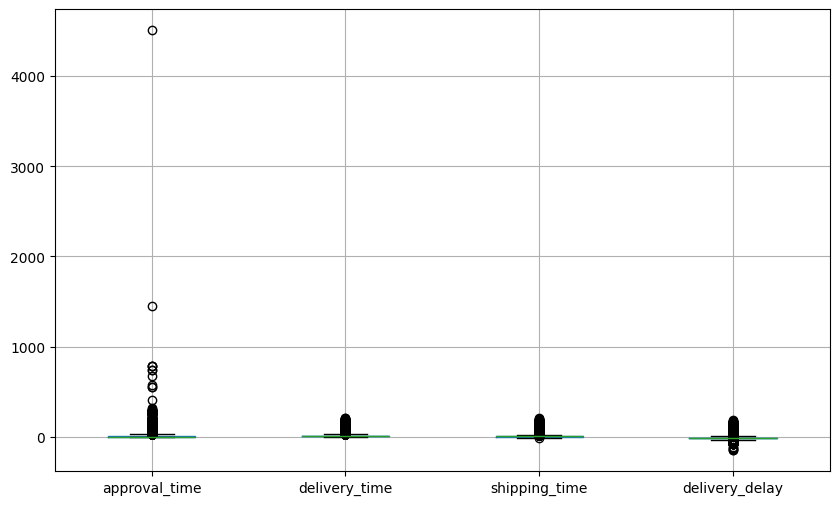

In [33]:
orders[cont_features_orders].boxplot(figsize=(10,6))
plt.show()

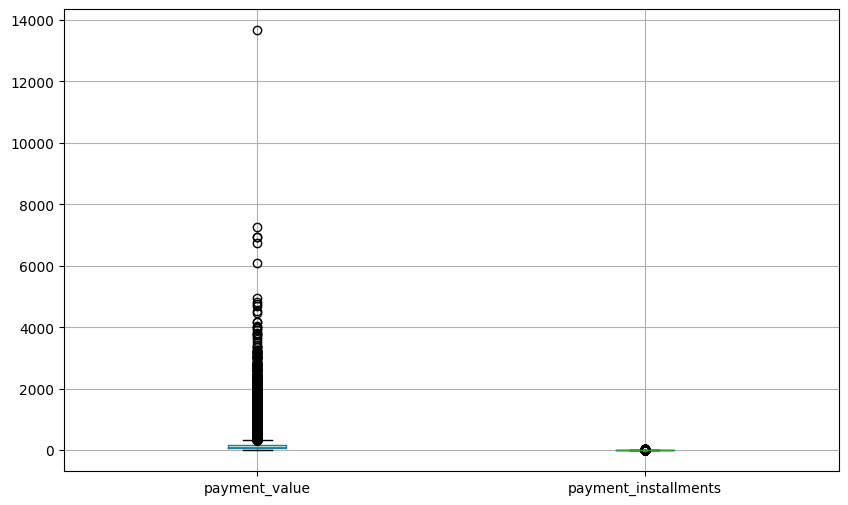

In [34]:
payments[cont_features_payments].boxplot(figsize=(10,6))
plt.show()

In [35]:
def treat_outliers_iqr(df, cols):
    for col in cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower, upper)
    return df

orders = treat_outliers_iqr(orders, cont_features_orders)
payments = treat_outliers_iqr(payments, cont_features_payments)

Let's check if the outliers have been treated using box plots

#### After Outlier Analysis

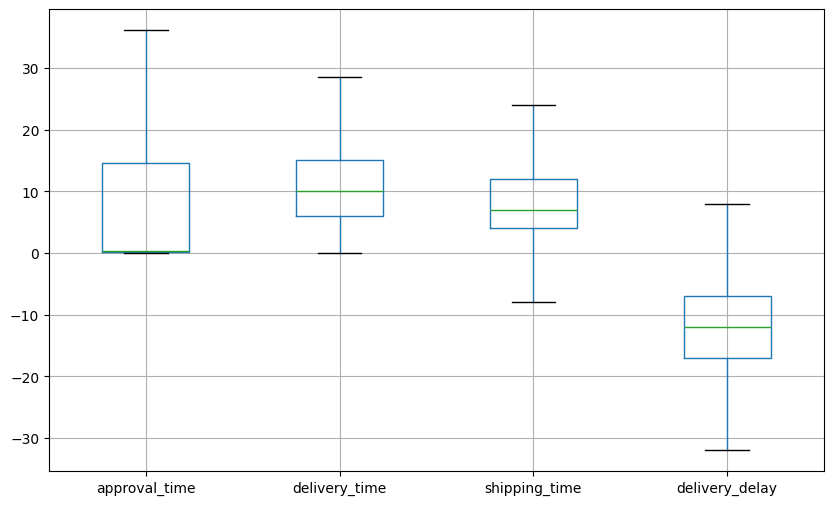

In [36]:
orders[cont_features_orders].boxplot(figsize=(10,6))
plt.show()

In [37]:
(orders[cont_features_orders]<0).sum()

approval_time         0
delivery_time         0
shipping_time        23
delivery_delay    88649
dtype: int64

In [38]:
orders['delivered_flag'].value_counts(normalize=True)

delivered_flag
1    0.970183
0    0.029817
Name: proportion, dtype: float64

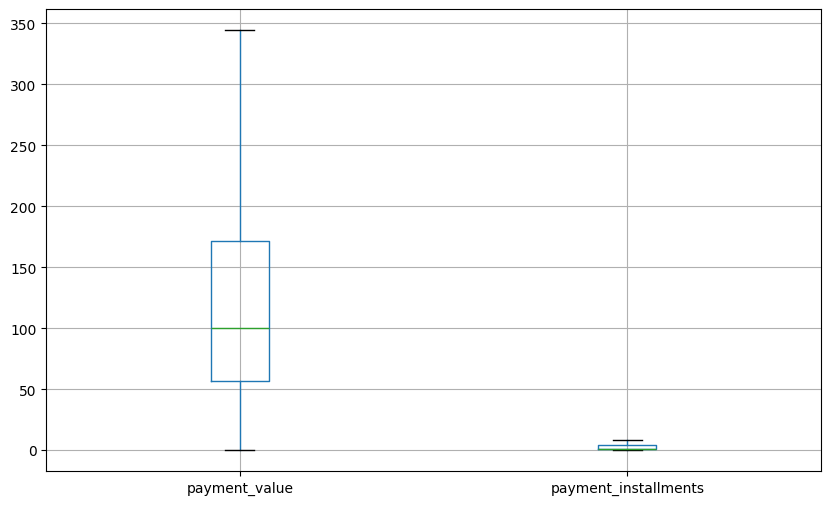

In [39]:
payments[cont_features_payments].boxplot(figsize=(10,6))
plt.show()

### SKEWNESS and LOG NORMAL DISTRIBUTION

#### Orders

In [40]:
numeric_cols_orders = orders.select_dtypes(include='number').columns
orders[numeric_cols_orders].skew()

approval_time     1.311233
delivery_time     0.880331
shipping_time     1.001263
delivery_delay    0.101496
delivered_flag   -5.529009
dtype: float64

#### Payments

In [41]:
numeric_cols_payments = payments.select_dtypes(include='number').columns
payments[numeric_cols_payments].skew()

payment_sequential      16.180065
payment_installments     1.277690
payment_value            1.048190
dtype: float64

#### Reviews

In [42]:
numeric_cols_reviews = reviews.select_dtypes(include='number').columns
reviews[numeric_cols_reviews].skew()

review_score   -1.364386
dtype: float64

In [43]:
from utils.cleaning import log_transform_skewed

orders_transformed = log_transform_skewed(orders)
payments_transformed = log_transform_skewed(payments)

Applied log transform on: approval_time (skew=1.31)
Skipped (low skew): delivery_time (skew=0.88)
Applied log transform on: shipping_time (skew=1.00)
Skipped (low skew): delivery_delay (skew=0.10)
Skipped (excluded): delivered_flag
Skipped (excluded): payment_sequential
Skipped (excluded): payment_installments
Applied log transform on: payment_value (skew=1.05)


In [44]:
print(orders_transformed[['approval_time','shipping_time']].skew())

approval_time    0.875724
shipping_time   -0.502980
dtype: float64


In [45]:
print(payments_transformed['payment_value'].skew())

-0.7722661103913849


In [46]:
orders = orders_transformed
payments = payments_transformed

### FEATURE SCALING

#### Orders

In [47]:
from sklearn.preprocessing import StandardScaler
orders_numeric_cols = ['approval_time', 'delivery_time', 'shipping_time', 'delivery_delay']

scaler = StandardScaler()
orders[orders_numeric_cols] = scaler.fit_transform(orders[orders_numeric_cols])

#### Payments

In [48]:
payments_numeric_cols = ['payment_value']

scaler_payments = StandardScaler()
payments[payments_numeric_cols] = scaler_payments.fit_transform(payments[payments_numeric_cols])

In [49]:
orders.to_csv("../data/processed/orders_cleaned.csv", index=False)
reviews.to_csv("../data/processed/reviews_cleaned.csv", index=False)
payments.to_csv("../data/processed/payments_cleaned.csv", index=False)